In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

#wykresy
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Wczytanie danych
df = pd.read_csv('dice5_sum_balanced.csv', header=None)

In [3]:
df.shape

(104000, 10001)

In [4]:
print(f"Rozmiar zbioru danych: {df.shape}")
print(f"Liczba wierszy: {df.shape[0]}")
print(f"Liczba kolumn: {df.shape[1]}")
print("\nPierwsze 5 wierszy:")
print(df.head())
print("\nUnikalne wartości w pierwszych 10 kolumnach:")
for i in range(min(10, df.shape[1])):
    unique_vals = df.iloc[:, i].unique()
    print(f"Kolumna {i}: {sorted(unique_vals)} (liczba: {len(unique_vals)})")

print("\nSprawdzanie brakujących wartości:")
print(df.isnull().sum())

Rozmiar zbioru danych: (104000, 10001)
Liczba wierszy: 104000
Liczba kolumn: 10001

Pierwsze 5 wierszy:
   0      1      2      3      4      5      6      7      8      9      ...  \
0      5     85     85     85     85     85     85     85     85     85  ...   
1      5    215    215    215    215    215    215    215    215    215  ...   
2      5     93     93     93    130    130     93     93     93     93  ...   
3      5     82     82     82     82     82     82     82     82     82  ...   
4      5     37     37     37     80     80     80     80     37     80  ...   

   9991   9992   9993   9994   9995   9996   9997   9998   9999   10000  
0    226    226    226    226    226    226    226     85     85     85  
1    215    215    175    175    175    175    175    215    175    175  
2     93     93     93     93    130    130     93     93     93     93  
3     82     82     82    164    164     82     82     82     82     82  
4     37     37     37     37     37     37  

Dostępne sumy oczek: [np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30)]
Wybrane sumy do wyświetlenia: [np.int64(5), np.int64(6), np.int64(7)]

Przykładowe obrazy dla różnych sum oczek:


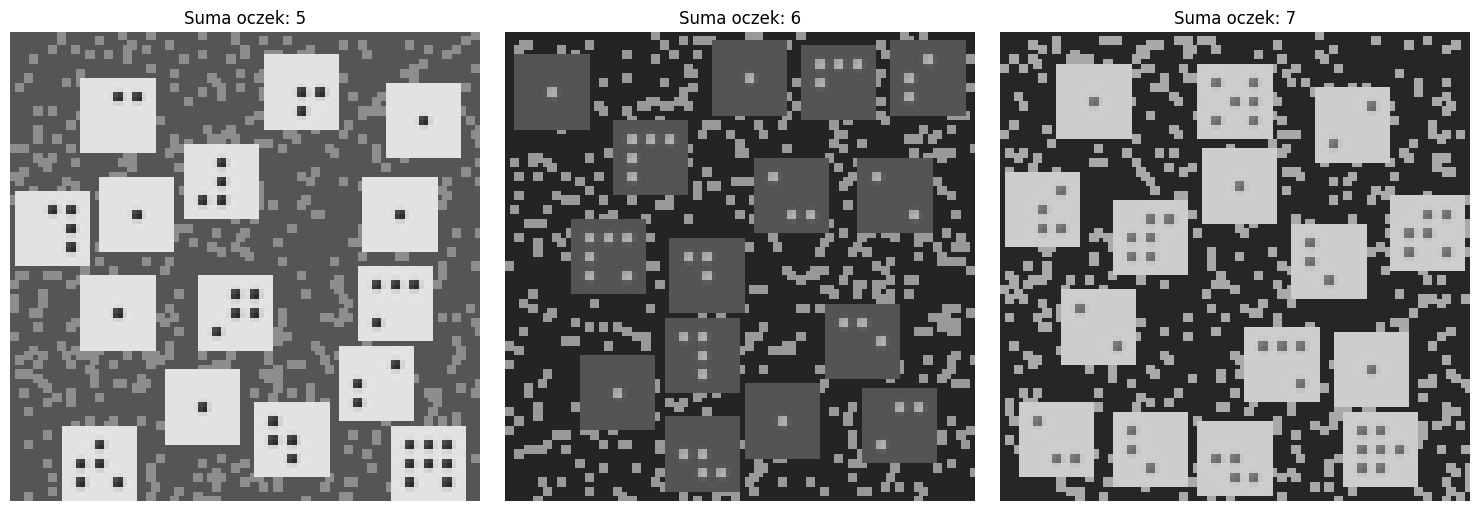

In [5]:
# Wizualizacja przykładowych obrazów dla różnych sum oczek
unique_sums = sorted(df.iloc[:, 0].unique())
selected_sums = unique_sums[:3] if len(unique_sums) >= 3 else unique_sums
print(f"Dostępne sumy oczek: {unique_sums}")
print(f"Wybrane sumy do wyświetlenia: {selected_sums}")
print("\nPrzykładowe obrazy dla różnych sum oczek:")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sum_val in enumerate(selected_sums[:3]):
    idx = df[df.iloc[:, 0] == sum_val].index[0]
    pixels = df.iloc[idx, 1:].values.reshape(100, 100)
    axes[i].imshow(pixels, cmap='gray', vmin=0, vmax=255)
    axes[i].set_title(f'Suma oczek: {sum_val}')
    axes[i].axis('off')
for j in range(len(selected_sums), 3):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [6]:

print(f'\nNajmniejsza suma oczek: {df.iloc[:, 0].min()}')
print(f'Największa suma oczek: {df.iloc[:, 0].max()}')



Najmniejsza suma oczek: 5
Największa suma oczek: 30


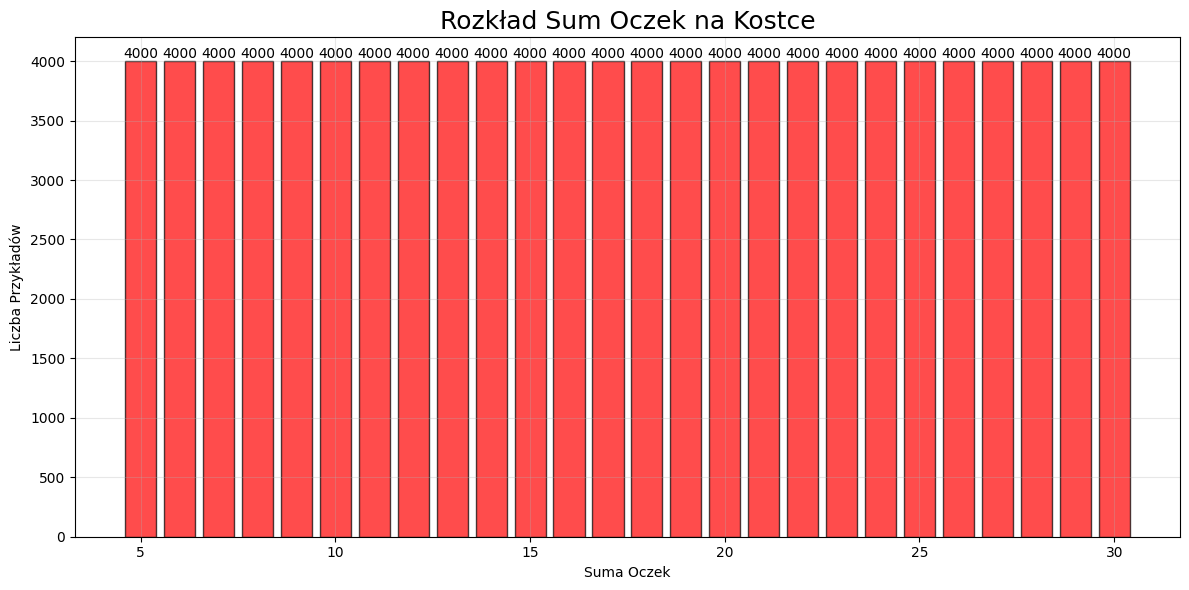

In [7]:
sum_counts = df.iloc[:, 0].value_counts().sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(sum_counts.index, sum_counts.values, color='Red', edgecolor='black', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title("Rozkład Sum Oczek na Kostce", fontsize=18)
plt.xlabel("Suma Oczek")
plt.ylabel("Liczba Przykładów")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Najjaśniejszy obraz: indeks 36354, jasność 194.48, suma oczek: 14
Najciemniejszy obraz: indeks 935, jasność 44.29, suma oczek: 5


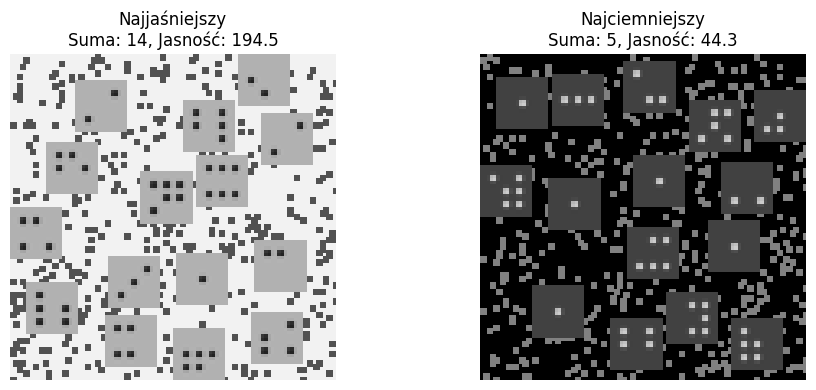

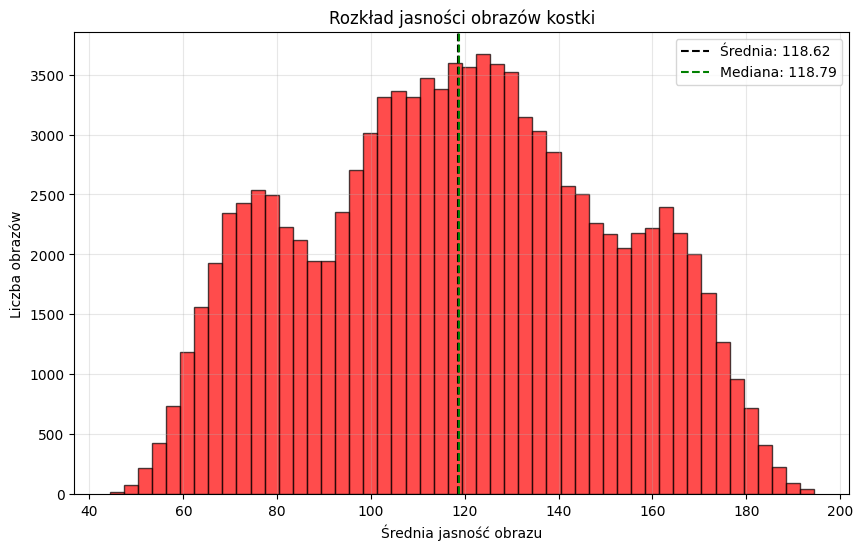

In [8]:
#srednia jasność
mean_brightness = df.iloc[:, 1:].mean(axis=1)
df_with_brightness = df.copy()
df_with_brightness['brightness'] = mean_brightness

#najjaśniejszy i najciemniejszy obraz
brightest_idx = mean_brightness.idxmax()
darkest_idx = mean_brightness.idxmin()

print(f"Najjaśniejszy obraz: indeks {brightest_idx}, jasność {mean_brightness[brightest_idx]:.2f}, suma oczek: {df.iloc[brightest_idx, 0]}")
print(f"Najciemniejszy obraz: indeks {darkest_idx}, jasność {mean_brightness[darkest_idx]:.2f}, suma oczek: {df.iloc[darkest_idx, 0]}")

#porównanie
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Najjaśniejszy obraz
brightest_pixels = df.iloc[brightest_idx, 1:].values.reshape(100, 100)
axes[0].imshow(brightest_pixels, cmap='gray', vmin=0, vmax=255)
axes[0].set_title(f'Najjaśniejszy\nSuma: {df.iloc[brightest_idx, 0]}, Jasność: {mean_brightness[brightest_idx]:.1f}')
axes[0].axis('off')

# Najciemniejszy obraz
darkest_pixels = df.iloc[darkest_idx, 1:].values.reshape(100, 100)
axes[1].imshow(darkest_pixels, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Najciemniejszy\nSuma: {df.iloc[darkest_idx, 0]}, Jasność: {mean_brightness[darkest_idx]:.1f}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Histogram jasności
plt.figure(figsize=(10, 6))
plt.hist(mean_brightness, bins=50, alpha=0.7, color='red', edgecolor='black')
plt.axvline(mean_brightness.mean(), color='black', linestyle='--', label=f'Średnia: {mean_brightness.mean():.2f}')
plt.axvline(mean_brightness.median(), color='green', linestyle='--', label=f'Mediana: {mean_brightness.median():.2f}')
plt.xlabel('Średnia jasność obrazu')
plt.ylabel('Liczba obrazów')
plt.title('Rozkład jasności obrazów kostki')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

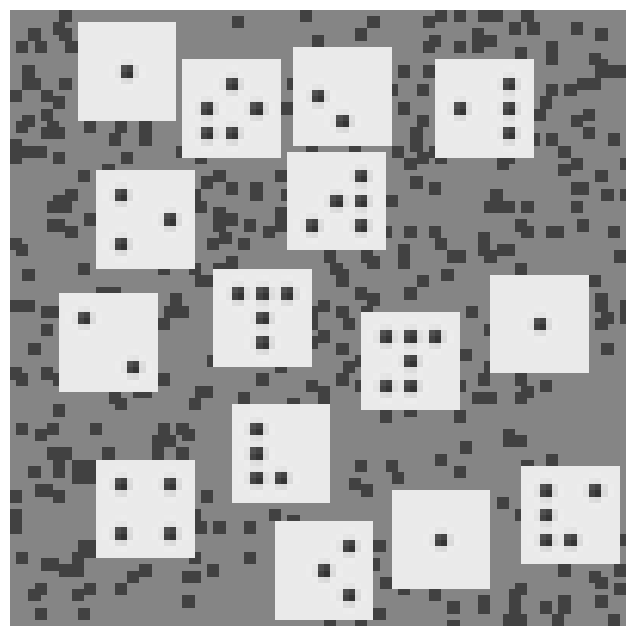

In [9]:
# Numer indeksu 
student_index = 120653
image_index = student_index % len(df)
selected_image_data = df.iloc[image_index]
image_pixels = selected_image_data.iloc[1:].values
image_2d = image_pixels.reshape(100, 100)

#obrazek
plt.figure(figsize=(8, 8))
plt.imshow(image_2d, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()



Etap 2 

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew, kurtosis
from scipy.ndimage import sobel

In [11]:
# Funkcja ekstrakcji cech

def extract_features(img):
    features = []
    
    #Podstawowe statystyki jasności
    features.append(img.mean())           # średnia jasność
    features.append(img.std())            # odchylenie standardowe
    features.append(img.min())            # minimalna wartość
    features.append(img.max())            # maksymalna wartość
    features.append(np.median(img))       # mediana
    
    # Statystyki rozkładu
    features.append(skew(img.flatten()))     # skośność
    features.append(kurtosis(img.flatten())) # kurtoza

    # Histogram
    hist, _ = np.histogram(img, bins=10, range=(0, 255))
    features.extend(hist / hist.sum())  

    # Krawędzie
    edges_h = np.abs(sobel(img, axis=0))
    edges_v = np.abs(sobel(img, axis=1))
    features.append(edges_h.mean())
    features.append(edges_v.mean())
    features.append(edges_h.std())
    features.append(edges_v.std())

    # Ciemne i jasne piksele
    threshold_low = img.mean() - img.std()
    threshold_high = img.mean() + img.std()
    features.append(np.sum(img < threshold_low) / img.size)
    features.append(np.sum(img > threshold_high) / img.size)

    # Kontrast
    features.append(img.max() - img.min())

    # Entropia
    hist_norm = hist / hist.sum()
    entropy = -np.sum(hist_norm * np.log2(hist_norm + 1e-10))
    features.append(entropy)
    
    return np.array(features)



In [27]:
# Przygotowanie danych i podział na zbiory

# Wczytanie danych
labels = df.iloc[:, 0].values
images = df.iloc[:, 1:].values.reshape(-1, 100, 100).astype('float32')

print(f"Liczba próbek: {len(labels)}")
print(f"Zakres etykiet: {labels.min()} - {labels.max()}")
print(f"Liczba klas: {len(np.unique(labels))}")

# Ekstrakcja cech
print("\nEkstrakcja cech:")
X = np.array([extract_features(img) for img in images])
y = labels
print(f"Liczba cech: {X.shape[1]}")

# Podział na zbiór treningowy i testowy (stratyfikacja po klasach)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nRozmiar zbioru treningowego: {X_train.shape[0]}")
print(f"Rozmiar zbioru testowego: {X_test.shape[0]}")

# Normalizacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Liczba próbek: 104000
Zakres etykiet: 5 - 30
Liczba klas: 26

Ekstrakcja cech:
Liczba cech: 25

Rozmiar zbioru treningowego: 83200
Rozmiar zbioru testowego: 20800
Liczba cech: 25

Rozmiar zbioru treningowego: 83200
Rozmiar zbioru testowego: 20800


In [ ]:
#Trening modelu XGBoost
# Mapowanie etykiet 5-30 na 0-25 dla XGBoost
y_train_mapped = y_train - 5
y_test_mapped = y_test - 5

# Model XGBoost 
num_classes = len(np.unique(y))

xgb_model = XGBClassifier(
    n_estimators=150,
    max_depth=10,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    verbosity=0
)

# Trening modelu
xgb_model.fit(X_train_scaled, y_train_mapped)

# Predykcje (mapujemy z powrotem na 5-30)
y_pred_xgb_mapped = xgb_model.predict(X_test_scaled)
y_pred_xgb = y_pred_xgb_mapped + 5

# Wynik accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {acc_xgb:.4f}")


Accuracy: 0.1001


 1. Prawdziwa suma: 20 | Predykcja: 20 | Idealny
 2. Prawdziwa suma: 22 | Predykcja: 27 | Błąd: 5
 3. Prawdziwa suma: 15 | Predykcja: 25 | Błąd: 10
 4. Prawdziwa suma: 30 | Predykcja: 30 | Idealny
 5. Prawdziwa suma: 18 | Predykcja: 22 | Błąd: 4
 6. Prawdziwa suma:  5 | Predykcja:  5 | Idealny
 7. Prawdziwa suma:  8 | Predykcja:  9 | Błąd: 1
 8. Prawdziwa suma: 13 | Predykcja: 10 | Błąd: 3
 9. Prawdziwa suma: 11 | Predykcja: 10 | Błąd: 1
10. Prawdziwa suma: 11 | Predykcja:  6 | Błąd: 5
11. Prawdziwa suma: 16 | Predykcja:  5 | Błąd: 11
12. Prawdziwa suma: 29 | Predykcja: 28 | Błąd: 1


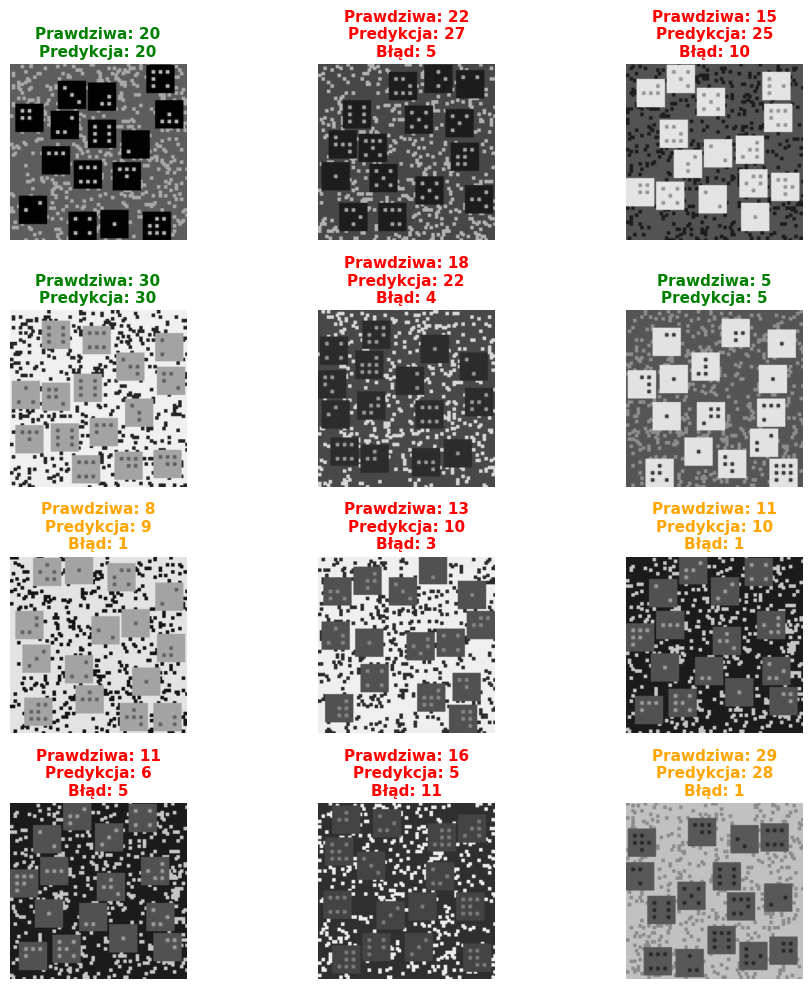

In [ ]:
# Wizualizacja przykładowych predykcji modelu

np.random.seed(390)  
sample_indices = np.random.choice(len(y_test), size=12, replace=False)
fig, axes = plt.subplots(4, 3, figsize=(10, 10))
axes = axes.flatten()

for plot_idx, sample_idx in enumerate(sample_indices):
    true_label = y_test[sample_idx]
    pred_label = y_pred_xgb[sample_idx]
    error = abs(true_label - pred_label)
    matching_idx = np.where(labels == true_label)[0][0]
    img = images[matching_idx] 
    axes[plot_idx].imshow(img, cmap='gray', vmin=0, vmax=255)
    color = 'green' if error == 0 'orange' if error <= 2 'red'
    title = f'Prawdziwa: {true_label}\nPredykcja: {pred_label}'
    if error > 0:
        title += f'\nBłąd: {error}'
    
    axes[plot_idx].set_title(title, fontsize=11, fontweight='bold', color=color)
    axes[plot_idx].axis('off')
    status = "Idealny" if error == 0 else f"Błąd: {error}"
    print(f"{plot_idx+1:2d}. Prawdziwa suma: {true_label:2d} | Predykcja: {pred_label:2d} | {status}")

plt.tight_layout()
plt.show()


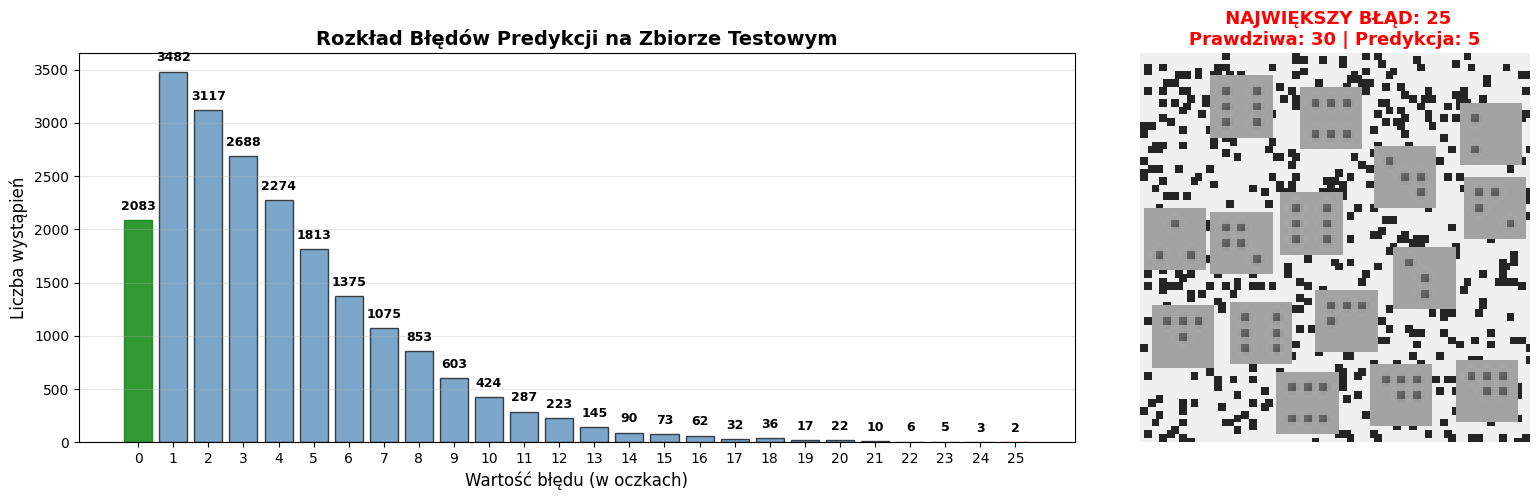

In [ ]:
# Analiza błędów predykcji - rozkład błędów i największy błąd

errors = np.abs(y_test - y_pred_xgb)
max_error_idx = np.argmax(errors)
max_error = errors[max_error_idx]
max_true = y_test[max_error_idx]
max_pred = y_pred_xgb[max_error_idx]
from collections import Counter
error_counts = Counter(errors)
error_values = sorted(error_counts.keys())
error_frequencies = [error_counts[e] for e in error_values]

# Wizualizacja
fig = plt.figure(figsize=(16, 5))

# Rozkład błędów (histogram)
ax1 = plt.subplot(1, 3, (1, 2))
bars = ax1.bar(error_values, error_frequencies, color='steelblue', edgecolor='black', alpha=0.7)

if 0 in error_counts:
    bars[0].set_color('green')
    bars[0].set_alpha(0.8)
max_error_pos = error_values.index(max_error)
bars[max_error_pos].set_color('red')
bars[max_error_pos].set_alpha(0.8)

for i, (e, f) in enumerate(zip(error_values, error_frequencies)):
    if f > 0:  
        ax1.text(e, f + max(error_frequencies)*0.02, str(f), 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.set_xlabel('Wartość błędu (w oczkach)', fontsize=12)
ax1.set_ylabel('Liczba wystąpień', fontsize=12)
ax1.set_title('Rozkład Błędów Predykcji na Zbiorze Testowym', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticks(error_values)


# Przykład największego błędu
ax2 = plt.subplot(1, 3, 3)
matching_idx = np.where(labels == max_true)[0][0]
img_max = images[matching_idx]
ax2.imshow(img_max, cmap='gray', vmin=0, vmax=255)
ax2.set_title(f' NAJWIĘKSZY BŁĄD: {int(max_error)}\nPrawdziwa: {max_true} | Predykcja: {max_pred}', 
              fontsize=13, fontweight='bold', color='red')
ax2.axis('off')

plt.tight_layout()
plt.show()


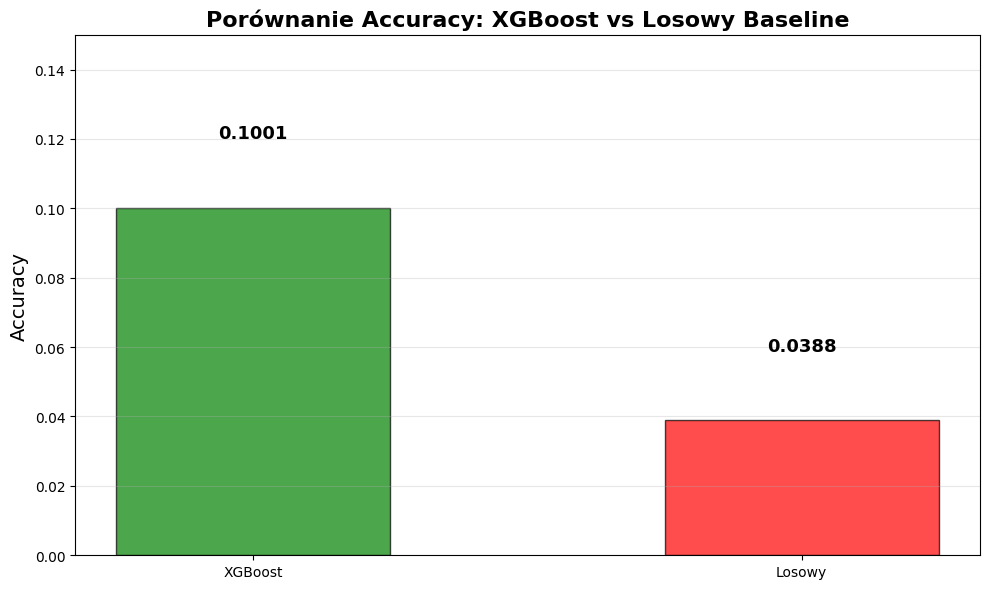

In [ ]:
# Porównanie modelu XGBoost z losowym baseline'em
np.random.seed(42)
y_pred_random = np.random.choice(np.unique(y_train), size=len(y_test))

# Metryki dla losowego modelu
acc_random = accuracy_score(y_test, y_pred_random)
mae_random = mean_absolute_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
improvement_acc = ((acc_xgb - acc_random) / acc_random) * 100
improvement_mae = ((mae_random - mae_xgb) / mae_random) * 100
improvement_r2 = r2_xgb - r2_random


# Wizualizacja porównawcza 
plt.figure(figsize=(10, 6))

models = ['XGBoost', 'Losowy']
colors = ['green', 'red']

plt.bar(models, [acc_xgb, acc_random], color=colors, alpha=0.7, edgecolor='black', width=0.5)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Porównanie Accuracy: XGBoost vs Losowy Baseline', fontsize=16, fontweight='bold')
plt.ylim(0, 0.15)
plt.grid(True, alpha=0.3, axis='y')

for i, v in enumerate([acc_xgb, acc_random]):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


# Etap 3 


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f"Device: {device}")

Device: mps


In [ ]:
# Przygotowanie danych
if 'labels' not in locals() or 'images' not in locals():
    labels = df.iloc[:, 0].values
    images = df.iloc[:, 1:].values.reshape(-1, 100, 100).astype('float32')

X_imgs = images.astype('float32') / 255.0
y_lbls = labels - 5  # 5-30 -> 0-25

# Podział: 70% train, 15% val, 15% test
X_temp, X_test_nn, y_temp, y_test_nn = train_test_split(X_imgs, y_lbls, test_size=0.15, random_state=42, stratify=y_lbls)
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)

X_train_t = torch.FloatTensor(X_train_nn).unsqueeze(1)
X_val_t = torch.FloatTensor(X_val_nn).unsqueeze(1)
X_test_t = torch.FloatTensor(X_test_nn).unsqueeze(1)
y_train_t = torch.LongTensor(y_train_nn)
y_val_t = torch.LongTensor(y_val_nn)
y_test_t = torch.LongTensor(y_test_nn)

class DiceDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X, self.y = X, y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# DataLoadery
batch_size = 64
train_loader = DataLoader(DiceDataset(X_train_t, y_train_t), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(DiceDataset(X_val_t, y_val_t), batch_size=batch_size)
test_loader = DataLoader(DiceDataset(X_test_t, y_test_t), batch_size=batch_size)

In [ ]:
class SumDiceNet(nn.Module):
    def __init__(self, max_sum=30):
        super(SumDiceNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, 5, padding=2)
        self.bn1 = nn.BatchNorm2d(64)

        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)

        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)

        self.pool = nn.MaxPool2d(2, 2)
        self.gap = nn.AdaptiveAvgPool2d(1)

        self.valid_head = nn.Linear(256, 64)
        self.valid_out = nn.Linear(64, 1)

        self.pip_out = nn.Linear(128, 7)

        self.sum_head = nn.Linear(256, 256)
        self.sum_out = nn.Linear(256, max_sum)

    def forward(self, x):
        x = self.pool(F.gelu(self.bn1(self.conv1(x))))
        x = self.pool(F.gelu(self.bn2(self.conv2(x))))
        x = self.pool(F.gelu(self.bn3(self.conv3(x))))

        x = self.gap(x)
        x = x.view(x.size(0), -1)

        v = torch.sigmoid(self.valid_out(F.gelu(self.valid_head(x))))

        p = self.pip_out(F.gelu(self.pip_head(x)))

        s = self.sum_out(F.gelu(self.sum_head(x)))

        return {"valid": v, "pips": p, "sum": s}

In [ ]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
model = SumDiceNet(max_sum=30).to(device)

criterion = nn.CrossEntropyLoss()    
optimizer = optim.AdamW(model.parameters(), lr=0.003, weight_decay=1e-4)

In [ ]:
def train_epoch(model, loader, optimizer, device):
    model.train()
    total_loss = 0

    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)   # suma oczek

        out = model(images)["sum"]   # tylko suma do lossu

        loss = criterion(out, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(loader)


def evaluate(model, loader, device):
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)

            out = model(images)["sum"]
            preds = torch.argmax(out, dim=1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return correct / total


In [ ]:
# Trening CNN
epochs = 15
best_val_acc = 0
patience, patience_limit = 0, 10
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)

for epoch in range(epochs):
    train_loss = train_epoch(model, train_loader, optimizer, device)
    val_acc = evaluate(model, val_loader, device)
    train_acc = evaluate(model, train_loader, device)
    scheduler.step(val_acc)
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        patience = 0
        torch.save(model.state_dict(), 'best_cnn.pth')
    else:
        patience += 1
    
    print(f"Epoch [{epoch+1}/{epochs}] Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Acc: {val_acc:.4f}")
    
    if patience >= patience_limit:
        print(f"Early stop at epoch {epoch+1}")
        break

model.load_state_dict(torch.load('best_cnn.pth'))
print(f"\nBest Val Acc: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")

Epoch [1/15] Train Loss: 3.0386, Train Acc: 0.0634 | Val Acc: 0.0627
Epoch [2/15] Train Loss: 2.6152, Train Acc: 0.0952 | Val Acc: 0.0926
Epoch [2/15] Train Loss: 2.6152, Train Acc: 0.0952 | Val Acc: 0.0926
Epoch [3/15] Train Loss: 2.3083, Train Acc: 0.0992 | Val Acc: 0.0967
Epoch [3/15] Train Loss: 2.3083, Train Acc: 0.0992 | Val Acc: 0.0967
Epoch [4/15] Train Loss: 1.9845, Train Acc: 0.3197 | Val Acc: 0.3107
Epoch [4/15] Train Loss: 1.9845, Train Acc: 0.3197 | Val Acc: 0.3107
Epoch [5/15] Train Loss: 1.7172, Train Acc: 0.1828 | Val Acc: 0.1762
Epoch [5/15] Train Loss: 1.7172, Train Acc: 0.1828 | Val Acc: 0.1762
Epoch [6/15] Train Loss: 1.4810, Train Acc: 0.3489 | Val Acc: 0.3390
Epoch [6/15] Train Loss: 1.4810, Train Acc: 0.3489 | Val Acc: 0.3390
Epoch [7/15] Train Loss: 1.2729, Train Acc: 0.4176 | Val Acc: 0.4074
Epoch [7/15] Train Loss: 1.2729, Train Acc: 0.4176 | Val Acc: 0.4074
Epoch [8/15] Train Loss: 1.0788, Train Acc: 0.6383 | Val Acc: 0.6144
Epoch [8/15] Train Loss: 1.0788, T

In [ ]:
# Ewaluacja CNN na zbiorze testowym
test_acc_cnn = evaluate(model, test_loader, device)
model.eval()
y_pred_cnn = []
y_true_cnn = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        out = model(images)["sum"]
        preds = torch.argmax(out, dim=1)
        y_pred_cnn.extend(preds.cpu().numpy())
        y_true_cnn.extend(labels.numpy())

y_pred_cnn = np.array(y_pred_cnn)
y_true_cnn = np.array(y_true_cnn)

print(f"Test Accuracy: {test_acc_cnn:.4f} ({test_acc_cnn*100:.2f}%)")

# Mapowanie 0-25 -> 5-30
y_pred_orig = y_pred_cnn + 5
y_true_orig = y_true_cnn + 5

Test Accuracy: 0.8785 (87.85%)


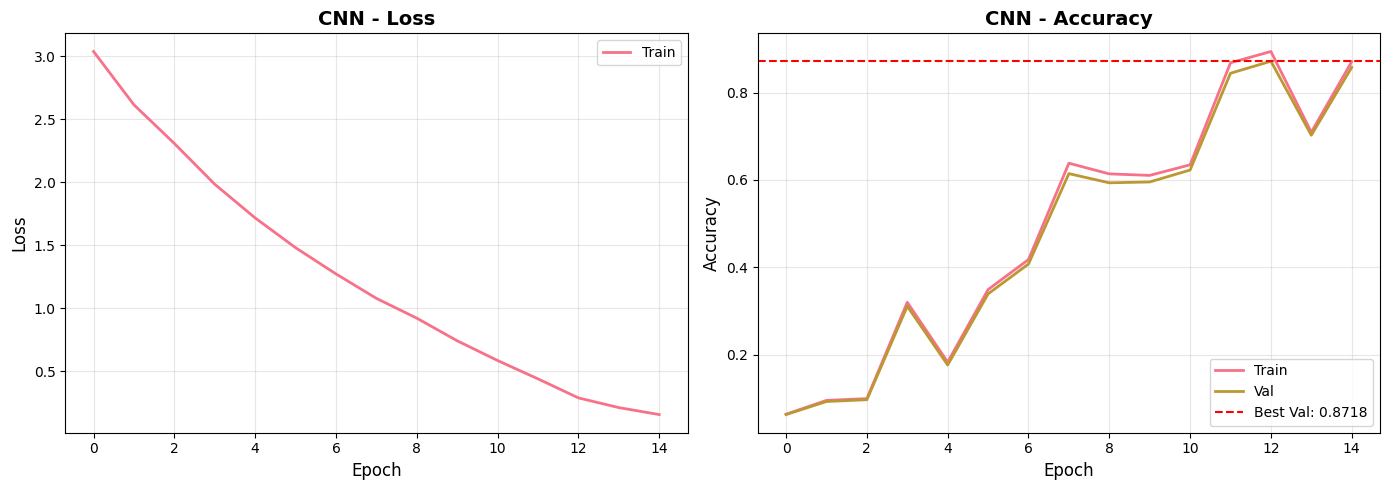

In [12]:
# Wizualizacja treningu
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Loss
ax[0].plot(history['train_loss'], label='Train', linewidth=2)
ax[0].set_xlabel('Epoch', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].set_title('CNN - Loss', fontweight='bold', fontsize=14)
ax[0].legend()
ax[0].grid(alpha=0.3)

# Accuracy
ax[1].plot(history['train_acc'], label='Train', linewidth=2)
ax[1].plot(history['val_acc'], label='Val', linewidth=2)
ax[1].axhline(best_val_acc, color='r', linestyle='--', label=f'Best Val: {best_val_acc:.4f}')
if 'acc_xgb' in locals():
    ax[1].axhline(acc_xgb, color='orange', linestyle='--', label=f'XGBoost: {acc_xgb:.4f}')
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].set_ylabel('Accuracy', fontsize=12)
ax[1].set_title('CNN - Accuracy', fontweight='bold', fontsize=14)
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

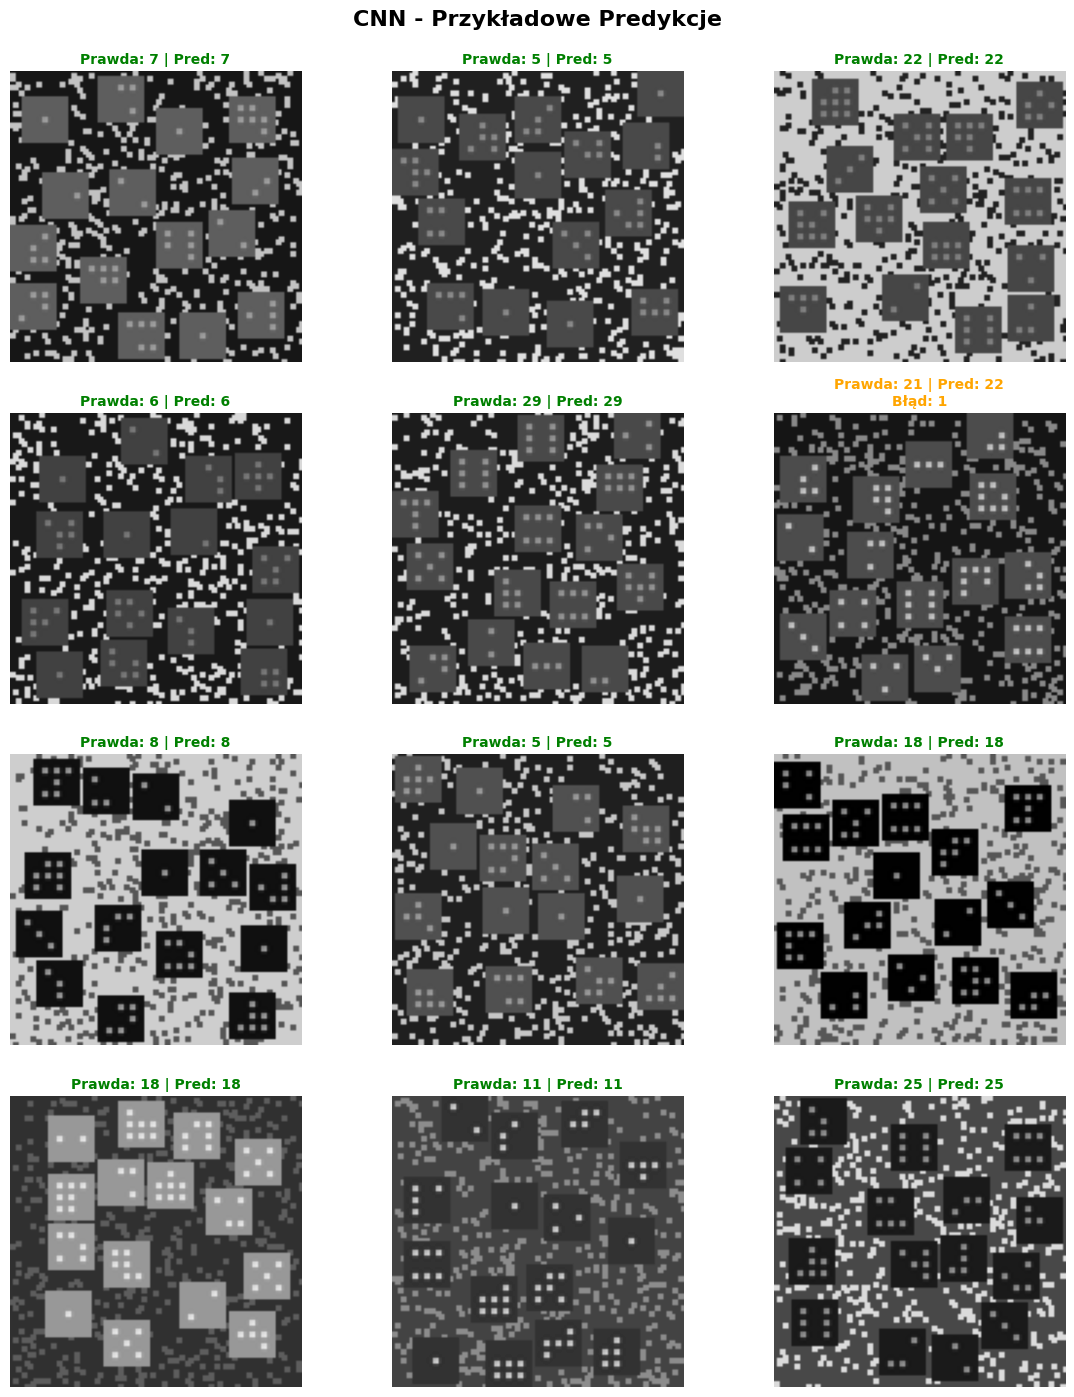

In [ ]:
# Wizualizacja przykładowych predykcji CNN
sample_indices = np.random.choice(len(y_test_nn), size=12, replace=False)

fig, axes = plt.subplots(4, 3, figsize=(12, 14))
axes = axes.flatten()

for plot_idx, sample_idx in enumerate(sample_indices):
    true_label = y_test_nn[sample_idx] + 5  
    pred_label = y_pred_cnn[sample_idx] + 5
    error = abs(true_label - pred_label)
    img = X_test_nn[sample_idx]
    
    axes[plot_idx].imshow(img, cmap='gray', vmin=0, vmax=1)  
    color = 'green' if error == 0 'orange' if error <= 2 'red'
    title = f'Prawda: {true_label} | Pred: {pred_label}'
    if error > 0:
        title += f'\nBłąd: {error}'
    
    axes[plot_idx].set_title(title, fontsize=10, fontweight='bold', color=color)
    axes[plot_idx].axis('off')

plt.suptitle('CNN - Przykładowe Predykcje', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

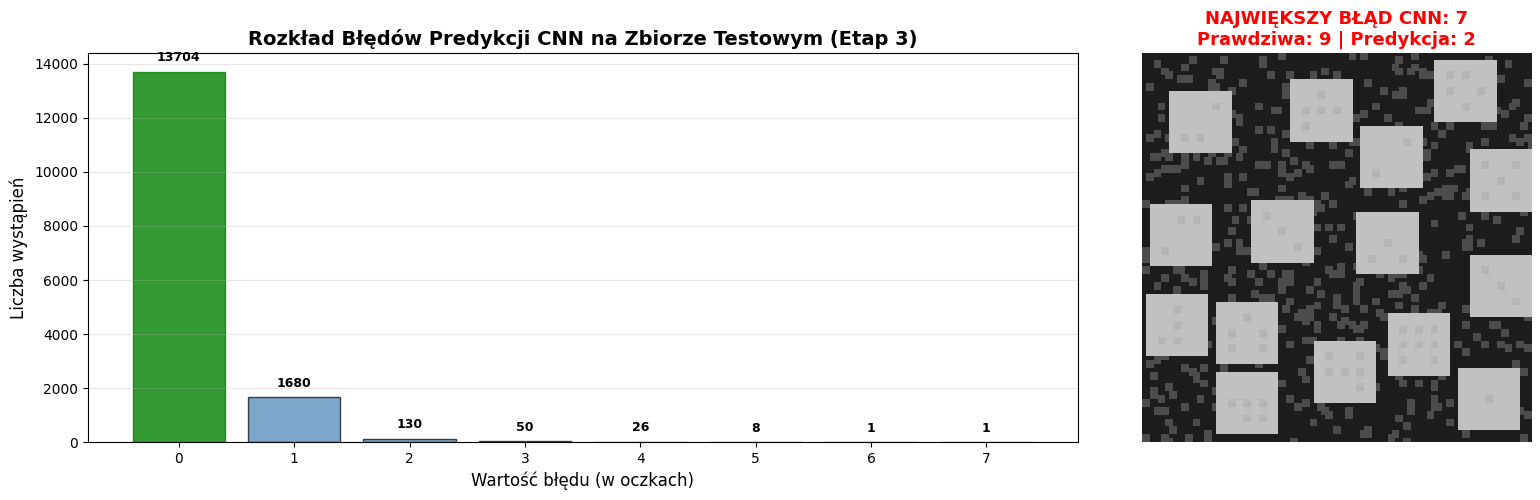

In [ ]:
errors_cnn_analysis = np.abs(y_true_cnn - y_pred_cnn)
max_error_idx_cnn = np.argmax(errors_cnn_analysis)
max_error_cnn = errors_cnn_analysis[max_error_idx_cnn]
max_true_cnn = y_true_cnn[max_error_idx_cnn]
max_pred_cnn = y_pred_cnn[max_error_idx_cnn]

from collections import Counter
error_counts_cnn = Counter(errors_cnn_analysis)
error_values_cnn = sorted(error_counts_cnn.keys())
error_frequencies_cnn = [error_counts_cnn[e] for e in error_values_cnn]

# Wizualizacja
fig = plt.figure(figsize=(16, 5))

# Rozkład błędów (histogram)
ax1 = plt.subplot(1, 3, (1, 2))
bars = ax1.bar(error_values_cnn, error_frequencies_cnn, color='steelblue', edgecolor='black', alpha=0.7)

if 0 in error_counts_cnn:
    bars[0].set_color('green')
    bars[0].set_alpha(0.8)
max_error_pos = error_values_cnn.index(max_error_cnn)
bars[max_error_pos].set_color('red')
bars[max_error_pos].set_alpha(0.8)

for i, (e, f) in enumerate(zip(error_values_cnn, error_frequencies_cnn)):
    if f > 0:  
        ax1.text(e, f + max(error_frequencies_cnn)*0.02, str(f), 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.set_xlabel('Wartość błędu (w oczkach)', fontsize=12)
ax1.set_ylabel('Liczba wystąpień', fontsize=12)
ax1.set_title('Rozkład Błędów Predykcji CNN na Zbiorze Testowym (Etap 3)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticks(error_values_cnn)

# Przykład największego błędu
ax2 = plt.subplot(1, 3, 3)
test_img_idx = max_error_idx_cnn
img_max = X_test_nn[test_img_idx].reshape(100, 100)
ax2.imshow(img_max, cmap='gray', vmin=0, vmax=1)
ax2.set_title(f'NAJWIĘKSZY BŁĄD CNN: {int(max_error_cnn)}\nPrawdziwa: {max_true_cnn} | Predykcja: {max_pred_cnn}', 
              fontsize=13, fontweight='bold', color='red')
ax2.axis('off')

plt.tight_layout()
plt.show()

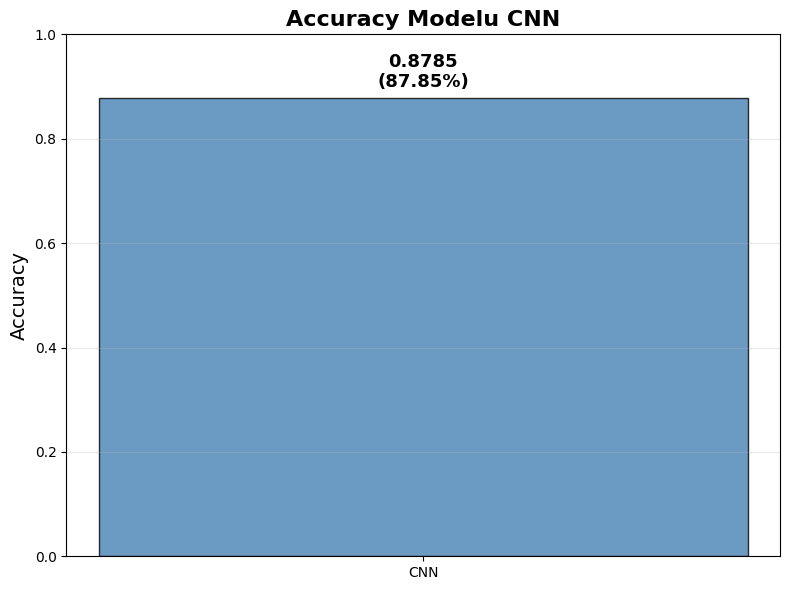

In [ ]:
# Wykres Accuracy modelu CNN
plt.figure(figsize=(8, 6))

plt.bar(['CNN'], [test_acc_cnn], color='steelblue', alpha=0.8, edgecolor='black', width=0.4)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Modelu CNN', fontsize=16, fontweight='bold')
plt.ylim(0, 1.0)
plt.grid(True, alpha=0.3, axis='y')
plt.text(0, test_acc_cnn + 0.02, f'{test_acc_cnn:.4f}\n({test_acc_cnn*100:.2f}%)', 
         ha='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()